In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
azon = pd.read_csv("C:\\Users\\Sunil Kumar\\OneDrive\\Desktop\\Brainwave-matrix-solution-task1\\Amazon Sales data.csv")


In [3]:
azon.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
azon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [5]:
azon['Order Date'] = pd.to_datetime(azon['Order Date'])
azon['Ship Date'] = pd.to_datetime(azon['Ship Date'])

In [6]:
azon['Region'] = azon['Region'].astype(str)
azon['Country'] = azon['Country'].astype(str)
azon['Item Type'] = azon['Item Type'].astype(str)
azon['Sales Channel'] = azon['Sales Channel'].astype(str)
azon['Order Priority'] = azon['Order Priority'].astype(str)

In [7]:
azon['Order Month'] = azon['Order Date'].dt.month
azon['Order Year'] = azon['Order Date'].dt.year
azon['Order Date MonthYear'] = azon['Order Date'].dt.strftime('%Y-%m')
azon = azon.drop(columns=['Order Date'])

In [8]:
pd.set_option('display.max_rows', None)
azon['Country'].value_counts()

Country
The Gambia                          4
Sao Tome and Principe               3
Australia                           3
Djibouti                            3
Sierra Leone                        3
Mexico                              3
Mali                                2
Norway                              2
Honduras                            2
Rwanda                              2
Myanmar                             2
Switzerland                         2
Turkmenistan                        2
Libya                               2
Cameroon                            2
Azerbaijan                          2
Bulgaria                            2
Kyrgyzstan                          1
Cape Verde                          1
Russia                              1
Tuvalu                              1
Grenada                             1
Senegal                             1
Republic of the Congo               1
Burkina Faso                        1
Angola                              1
Solo

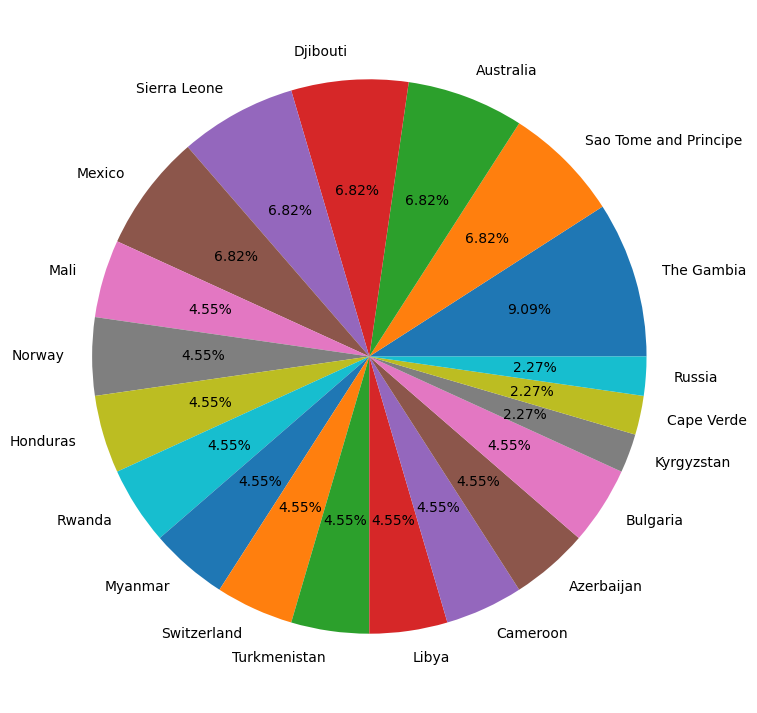

In [9]:
country_names = azon.Country.value_counts().index
country_val = azon.Country.value_counts().values


fig,ax = plt.subplots(figsize=(9,9))
ax.pie(country_val[:20],labels=country_names[:20],autopct='%1.2f%%')
plt.show()

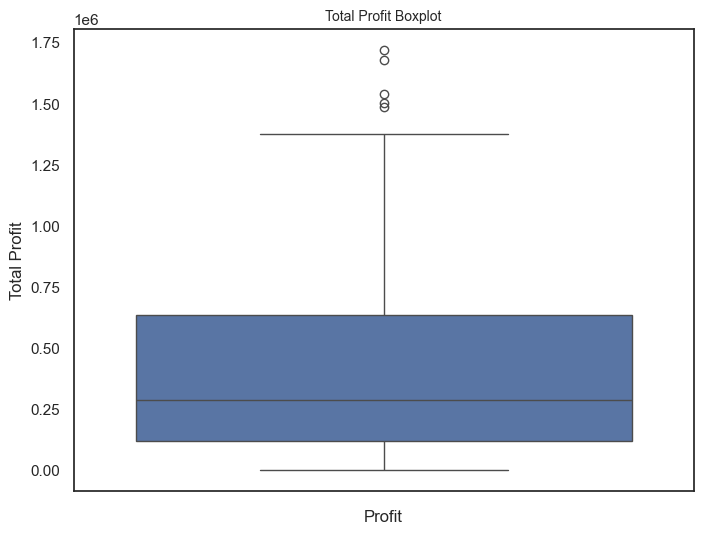

In [10]:
sns.set(style='white')
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(azon['Total Profit'])

plt.title('Total Profit Boxplot', fontsize=10)
plt.xlabel('Profit')
plt.show()

In [11]:
from scipy import stats

In [12]:
z = np.abs(stats.zscore(azon["Total Profit"]))
print(z)

0     1.168192
1     0.442948
2     0.497510
3     0.967494
4     0.452390
5     0.358882
6     0.578058
7     0.157067
8     0.663629
9     0.326333
10    0.994303
11    0.310731
12    0.378496
13    2.396250
14    0.730768
15    0.730662
16    1.757947
17    0.817364
18    0.442462
19    0.237761
20    0.624456
21    0.732576
22    0.731071
23    1.000164
24    0.721062
25    0.289013
26    0.982429
27    0.980087
28    0.828346
29    0.112073
30    2.438939
31    0.890200
32    0.166217
33    2.121261
34    0.086335
35    0.644160
36    0.991344
37    0.387335
38    0.928641
39    0.141350
40    0.839085
41    1.870317
42    0.582429
43    0.987503
44    0.014170
45    0.816929
46    2.521025
47    0.996564
48    0.307638
49    0.645940
50    0.630350
51    0.959187
52    0.187333
53    0.011999
54    0.970063
55    0.426191
56    0.654860
57    0.122212
58    0.905135
59    1.862746
60    0.873777
61    0.031290
62    0.584328
63    0.017136
64    0.332845
65    0.771724
66    0.51

In [13]:
threshold_z = 2
 
outlier_indices = np.where(z > threshold_z)[0]
no_outliers = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


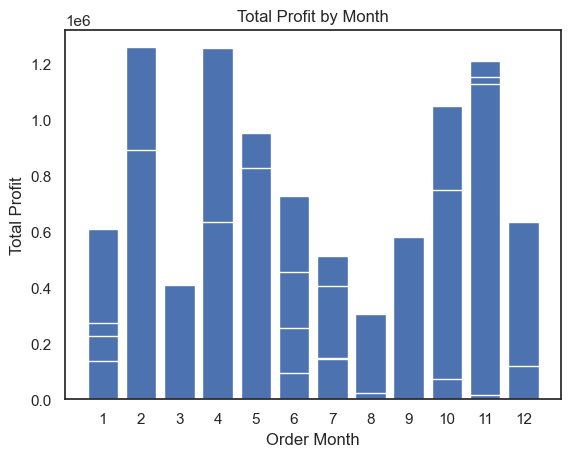

In [14]:
plt.bar(no_outliers['Order Month'], no_outliers['Total Profit'])
plt.title('Total Profit by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Profit')
plt.show()

Text(0.5, 1.0, 'Profit per year')

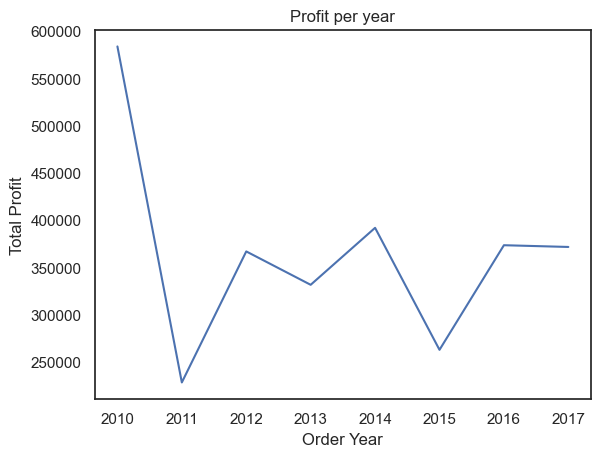

In [15]:
no_outliers.groupby('Order Year')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Profit per year')

Text(0.5, 1.0, 'Yearly-month wise profit')

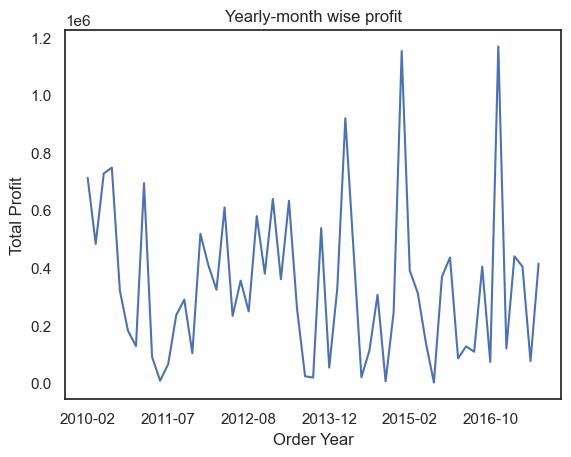

In [16]:
no_outliers.groupby('Order Date MonthYear')['Total Profit'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Profit')
plt.title('Yearly-month wise profit')

Yearly-month-wise profit peaked in February of 2015 and October of 2016

In [19]:
z1 = np.abs(stats.zscore(azon["Total Cost"]))

In [20]:
outlier_indices1 = np.where(z > threshold_z)[0]
no_outliers1 = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers1.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


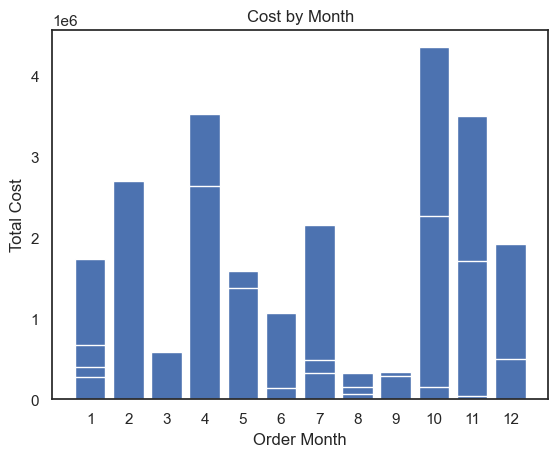

In [21]:
plt.bar(no_outliers1['Order Month'], no_outliers1['Total Cost'])
plt.title('Cost by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Cost')
plt.show()

Total cost was max in October.

Text(0.5, 1.0, 'Cost per year')

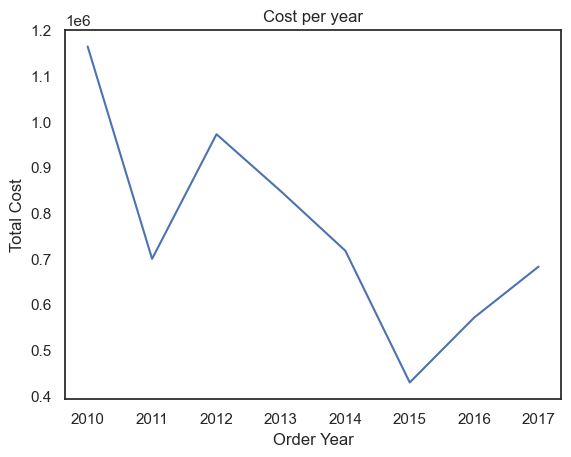

In [22]:
no_outliers1.groupby('Order Year')['Total Cost'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.title('Cost per year')

Text(0.5, 1.0, 'Yearly-month wise cost')

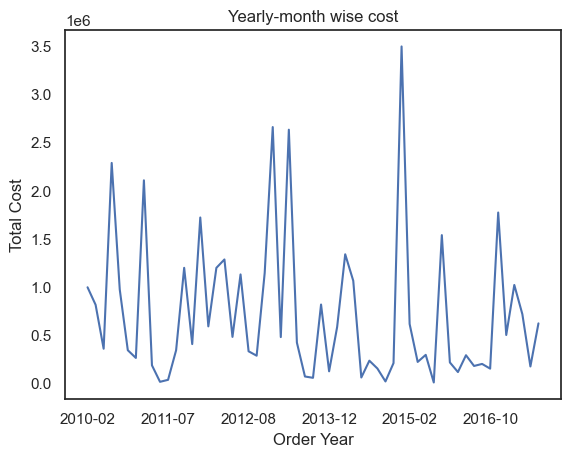

In [23]:
no_outliers1.groupby('Order Date MonthYear')['Total Cost'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Cost')
plt.title('Yearly-month wise cost')

The cost was max in February of 2015.

In [24]:
z2 = np.abs(stats.zscore(azon["Total Revenue"]))
outlier_indices2 = np.where(z > threshold_z)[0]
no_outliers2 = azon.drop(outlier_indices)
print("Original DataFrame Shape:", azon.shape)
print("DataFrame Shape after Removing Outliers:", no_outliers2.shape)

Original DataFrame Shape: (100, 16)
DataFrame Shape after Removing Outliers: (93, 16)


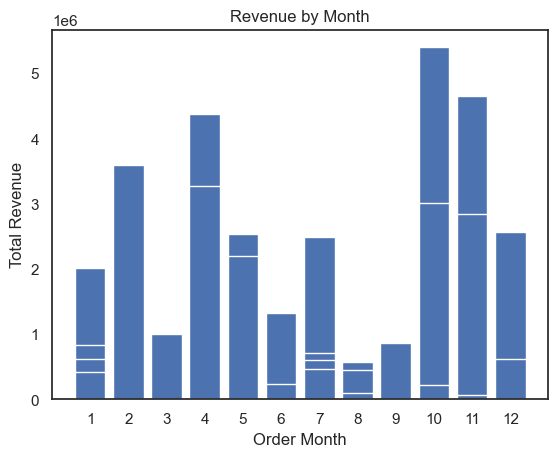

In [25]:
plt.bar(no_outliers2['Order Month'], no_outliers2['Total Revenue'])
plt.title('Revenue by Month')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel('Order Month')
plt.ylabel('Total Revenue')
plt.show()

Revenue was max in October.

Text(0.5, 1.0, 'Revenue per year')

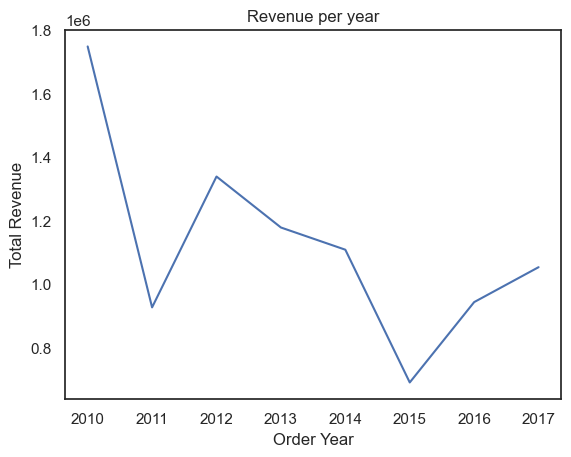

In [26]:
no_outliers2.groupby('Order Year')['Total Revenue'].mean().plot()
plt.xlabel('Order Year')
plt.ylabel('Total Revenue')
plt.title('Revenue per year')

Revenue was max in 2010.

Text(0.5, 1.0, 'Yearly-month wise revenue')

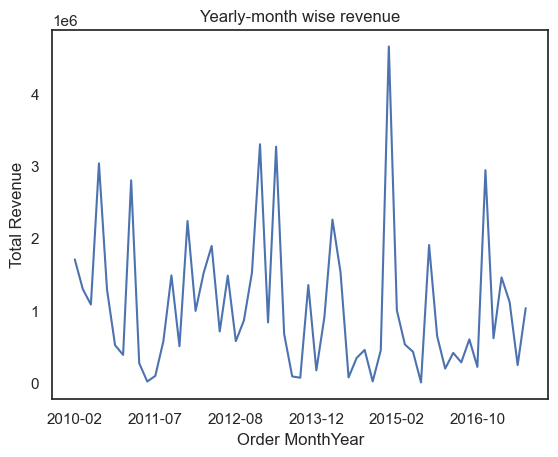

In [27]:
no_outliers2.groupby('Order Date MonthYear')['Total Revenue'].mean().plot()
plt.xlabel('Order MonthYear')
plt.ylabel('Total Revenue')
plt.title('Yearly-month wise revenue')